In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# **Question-1**

    Experimenting with an image of a pizza having various toppings.

- Applying the Harris Corner Detection algorithm to the image.
- Analyzing the results
  - Whether it detect corners on the pepperoni slices
  - If the crust edges identified as corners
  - How the algorithm handle the "Cheese Texture"

- Explaination on why the algorithm might struggle with circular shapes or irregular toppings.


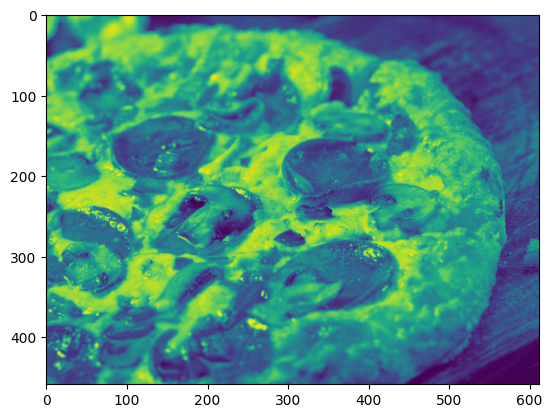

In [ ]:
pizza=cv2.cvtColor(cv2.imread('/content/Pizza.jpg'), cv2.COLOR_BGR2RGB)


pizza_gray = cv2.cvtColor(pizza, cv2.COLOR_RGB2GRAY)
pizza_gray = np.float32(pizza_gray)

dst = cv2.cornerHarris(pizza_gray, 2, 3, 0.04)

# Enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

plt.imshow(pizza_gray)



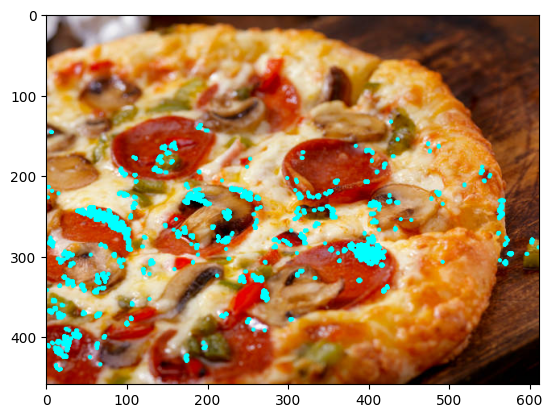

In [ ]:
threshold = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(pizza)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > threshold):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,255), 1)

plt.imshow(corner_image)

    Replacing the pizza with a perfectly triangle-shaped sandwich.
- **Comparing the results:** What kind of food makes Harris the happiest.

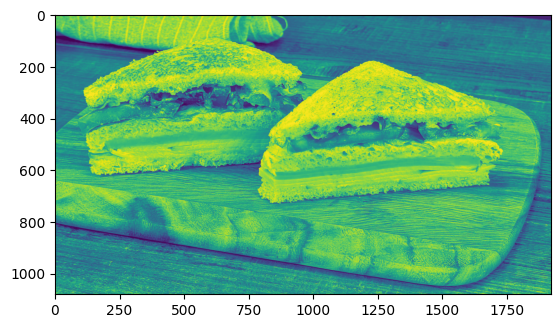

In [ ]:
sandwich=cv2.cvtColor(cv2.imread('/content/Sandwich.jpg'), cv2.COLOR_BGR2RGB)


sandwich_gray = cv2.cvtColor(sandwich, cv2.COLOR_RGB2GRAY)
sandwich_gray = np.float32(sandwich_gray)

dst = cv2.cornerHarris(sandwich_gray, 2, 3, 0.04)

# Enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

plt.imshow(sandwich_gray)

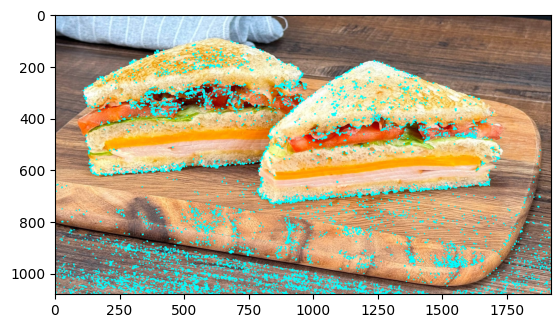

In [ ]:
threshold = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(sandwich)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > threshold):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,255), 1)

plt.imshow(corner_image)

    Analysis:

- Pepporoni slices aren't detected properly.

- he crust edges are not identified as corners.

- The Algorithm considers the cheese texture as edges/corners.

- It is clear that, the algorithm struggles with circular shapes or different toppings. As they have a comtinous edge without any angular distinction which has a very low gradient

- Foods with sharp edges like the sandwich are much suitable for harris corner detection. These have a high gradient with distinct corners

# **Question-2**

    Scenario:
A mischievous shape-shifting cat has escaped the virtual zoo and is causing chaos on the internet. The cat has been transforming its appearance to evade detection by the zookeepers! The task is to help track it down using advanced image processing techniques.


**Part-1**

    The Cat’s Trickery
The shape-shifting cat loves to transform. To simulate its tricks, the following transformations are shown on an image of the cat:
- The Shrinking Spell: **Scaling** the cat image down—now it’s small enough to hide under a digital couch!
- The Teleportation Act: **Translating** the cat image by **shifting** it horizontally and vertically.
- The Twisting Tail Move: **Rotating** the image (e.g., by 90°)—it’s trying to confuse its pursuers!
- The Sunbeam Glow: **Brightening** the image dramatically—it’s pretending to be a glowing angel.

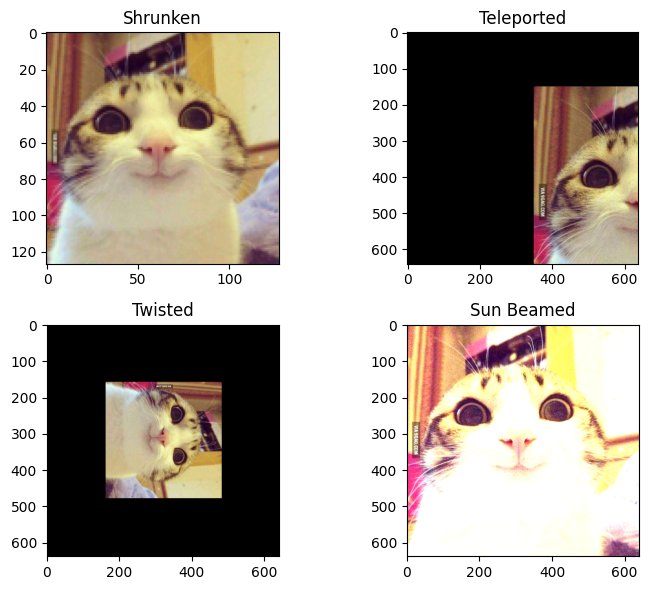

In [ ]:

cat_img=cv2.cvtColor(cv2.imread('/content/Cat.jpg'),cv2.COLOR_BGR2RGB)

transformations=[]

def shrink(img):
  width = int(img.shape[1] * 0.2)
  height = int(img.shape[0] * 0.2)
  dim = (width, height)
  resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  # plt.imshow(resized_image)
  return resized_img

def teleport(img,x=0,y=0):
  t_matrix=np.float32([[1, 0, x],
                       [0, 1, y]])
  t_img=cv2.warpAffine(img, t_matrix, (img.shape[0], img.shape[1]))

  return t_img

def twist_tail(img):
  rows,cols = img.shape[:2]
  M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,0.5)
  rotated_img = cv2.warpAffine(img,M,(cols,rows))
  # plt.imshow(rotated_img)
  return rotated_img

def sunbeam_glow(image, factor):
  brightend_image = np.clip(image * factor, 0, 255).astype(np.uint8)
  return brightend_image


def shape_shift(img,t_list):
  titles=['Shrunken', 'Teleported', 'Twisted', 'Sun Beamed']
  t_list.append(shrink(img))
  t_list.append(teleport(img, 350, 150))
  t_list.append(twist_tail(img))
  t_list.append(sunbeam_glow(img, 1.75))
  plt.figure(figsize=(10, 6))
  for i in range(len(t_list)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(t_list[i])
    plt.title(titles[i])
    # plt.axis('off')
    plt.tight_layout()

shape_shift(cat_img,transformations)


Part-2

    Deploying SIFT the Cat Tracker
Using SIFT (Scale-Invariant Feature Transform) as a digital pet tracker to:
- Extract the key points and descriptors from both the original and transformed images of the cat.
- Match the key points between the images to prove they’re the same shape-shifting MEOW🐈.
- Visualize the matches by drawing lines between the corresponding points on the two images.

This clever cat has been spotted disguised as a dog!
- Trying to use SIFT on two completely different images (e.g., a cat and a dog).
- Trying to find out if it confuses the two
- A short note explaining whether SIFT can handle such a devious disguise

Number of Keypoints Detected In The Training Image: 1310 
Number of Keypoints Detected In The Query Image: 381



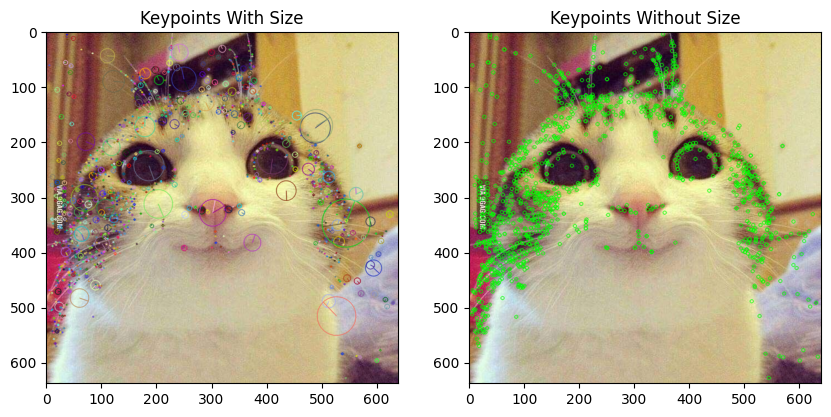

In [ ]:

def mark_keypoints(img):

  sift = cv2.SIFT_create()
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  train_keypoints, train_descriptor = sift.detectAndCompute(gray_img, None)
  test_keypoints, test_descriptor = sift.detectAndCompute(transformations[2], None)

  keypoints_without_size = np.copy(img)
  keypoints_with_size = np.copy(img)

  cv2.drawKeypoints(img, train_keypoints, keypoints_without_size, color = (0, 255, 0))
  cv2.drawKeypoints(img, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  fx, plots = plt.subplots(1, 2, figsize=(10,6))

  plots[0].set_title("Keypoints With Size")
  plots[0].imshow(keypoints_with_size, cmap='gray')

  plots[1].set_title("Keypoints Without Size")
  plots[1].imshow(keypoints_without_size, cmap='gray')


  print(f"Number of Keypoints Detected In The Training Image: {len(train_keypoints)} ")

  # Print the number of keypoints detected in the query image
  print(f"Number of Keypoints Detected In The Query Image: {len(test_keypoints)}\n")


mark_keypoints(cat_img)


Number of Matching Keypoints Between The Training and Query Images: 1310



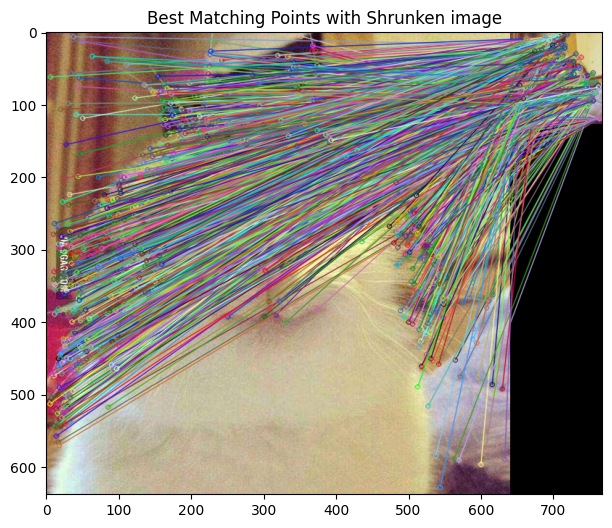


Number of Matching Keypoints Between The Training and Query Images: 1310



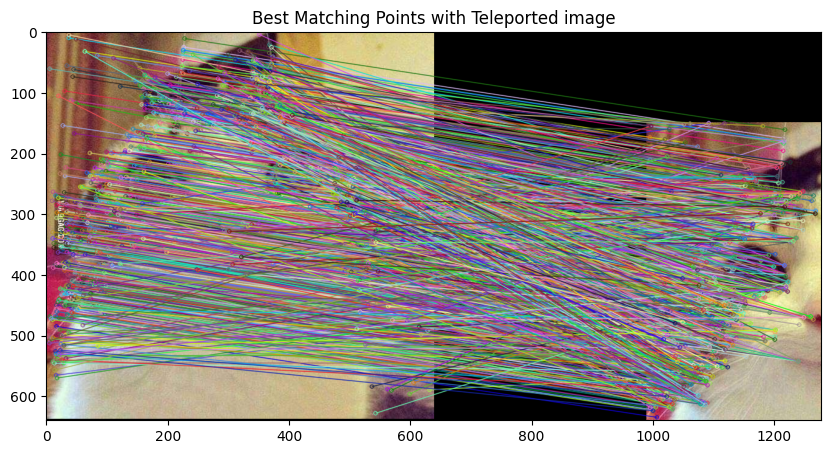


Number of Matching Keypoints Between The Training and Query Images: 1310



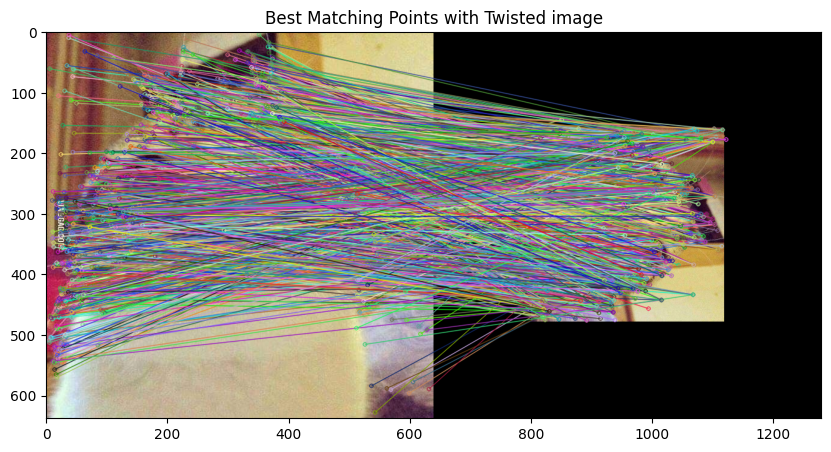


Number of Matching Keypoints Between The Training and Query Images: 1310



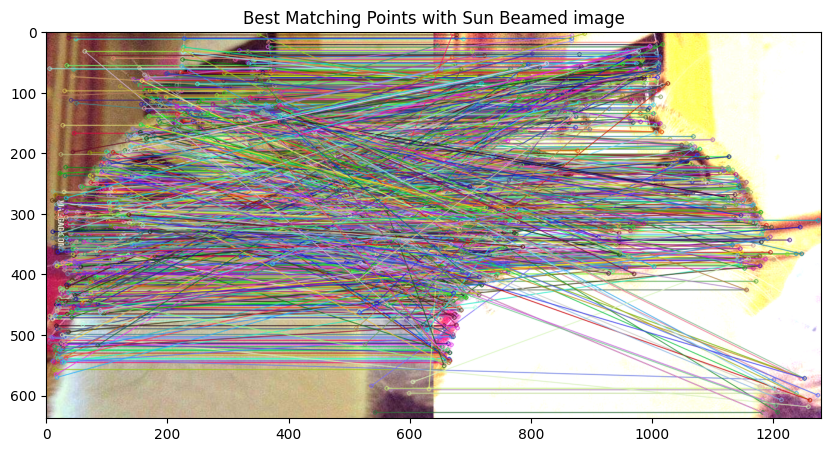

In [ ]:
titles=['Shrunken', 'Teleported', 'Twisted', 'Sun Beamed']

def match_keypoints(img, t_img, title='given'):

  sift = cv2.SIFT_create()
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  train_keypoints, train_descriptor = sift.detectAndCompute(gray_img, None)
  test_keypoints, test_descriptor = sift.detectAndCompute(t_img, None)

  keypoints_without_size = np.copy(img)
  keypoints_with_size = np.copy(img)

  cv2.drawKeypoints(img, train_keypoints, keypoints_without_size, color = (0, 255, 0))
  cv2.drawKeypoints(img, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

  matches = bf.match(train_descriptor, test_descriptor)
  matches = sorted(matches, key = lambda x : x.distance)

  result = cv2.drawMatches(img, train_keypoints, t_img, test_keypoints, matches, t_img, flags = 2)

  print(f"\nNumber of Matching Keypoints Between The Training and Query Images: {len(matches)}\n")

  plt.rcParams['figure.figsize'] = [10, 6]
  plt.title(f'Best Matching Points with {title} image')
  plt.imshow(result)
  plt.show()



for i in range(len(transformations)):
  match_keypoints(cat_img, transformations[i], titles[i])


Number of Matching Keypoints Between The Training and Query Images: 1310



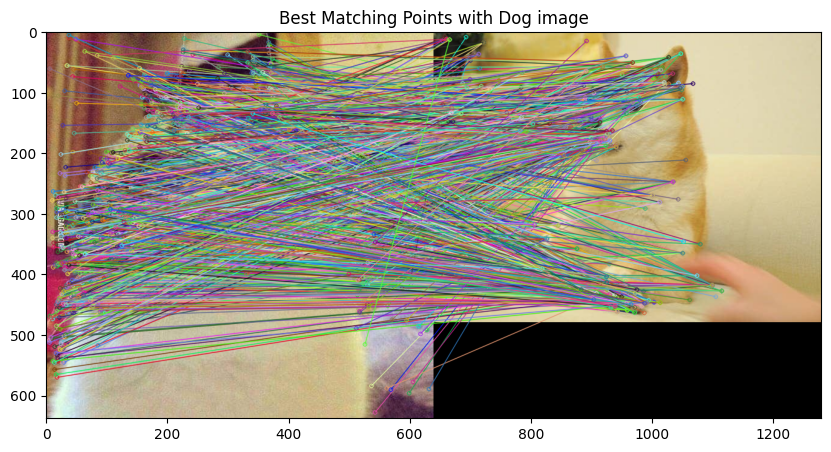


 Yes, SIFT confuses the two images as it has made matches between two different images. So, it can't handle such a devious disguise.


In [ ]:
dog_img=cv2.cvtColor(cv2.imread('/content/Dog.jpg'), cv2.COLOR_BGR2RGB)

match_keypoints(cat_img, dog_img, "Dog")

print(f"\n Yes, SIFT confuses the two images as it has made matches between two different images. So, it can't handle such a devious disguise.")

# **Question-3**


    Detecting lane lines using the Hough Line Transform and detect traffic signs using the Hough Circle Transform.




Takeing an image containing a road with lane markings and circular traffic signs.

- Loading and preprocess the image
- Converting the image to grayscale.
- Applying Gaussian blur to reduce noise.
- Using Canny edge detection to find edges.
- Detecting Lane Lines using Hough Line Transform


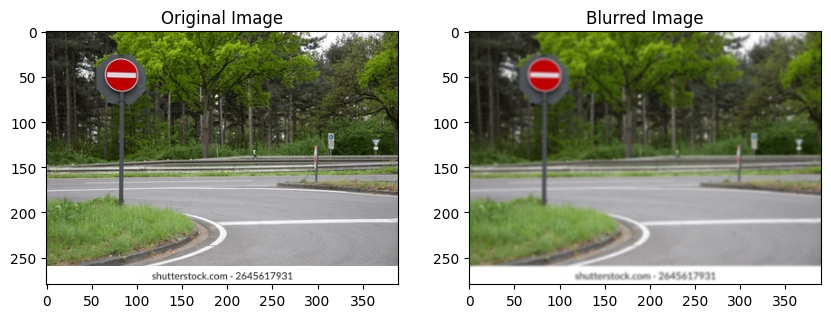

In [ ]:

traffic_sign = cv2.cvtColor(cv2.imread('/content/Traffic Signs.jpg'), cv2.COLOR_BGR2RGB)


traffic_sign_blurred = cv2.GaussianBlur(traffic_sign, (5, 5), sigmaX=0)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(traffic_sign)
plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(traffic_sign_blurred)

plt.show()

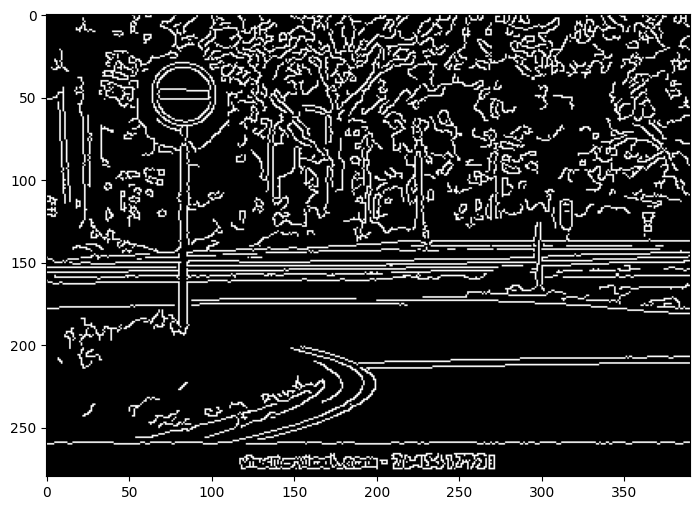

In [ ]:
signs_gray = cv2.cvtColor(traffic_sign_blurred, cv2.COLOR_RGB2GRAY)# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(signs_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

- Defining appropriate values for rho, theta, threshold, min_line_length, and max_line_gap.
- Using cv2.HoughLinesP() to detect straight lane lines.
- Drawing the detected lane lines on a copy of the original image.
- Detecting Traffic Signs using Hough Circle Transform (3)
- Using cv2.HoughCircles() to detect circular traffic signs.
- Tuning the parameters (dp, minDist, param1, param2, minRadius, maxRadius) for better detection.
- Drawing the detected circles on the same image.
- Displaying the final output (2)
- Showing the original image with detected lane lines (in blue) and traffic signs (in red circles).

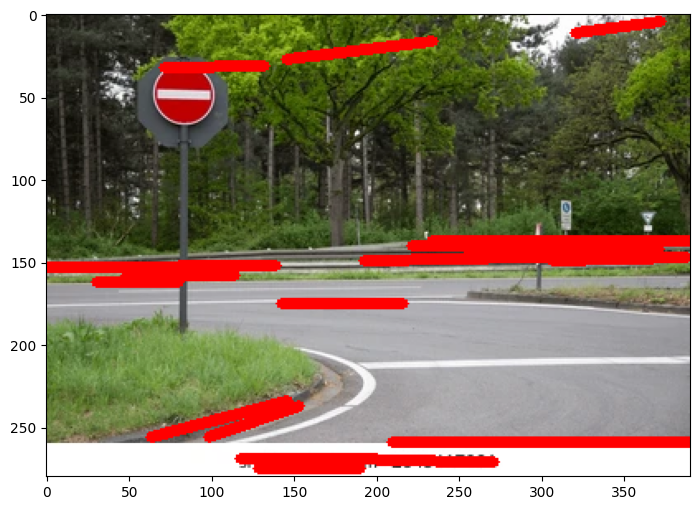

In [ ]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5
line_image = np.copy(traffic_sign) #creating an image copy to draw lines on# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)   # Iterate over the output "lines" and draw lines on the image copy

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

plt.imshow(line_image)

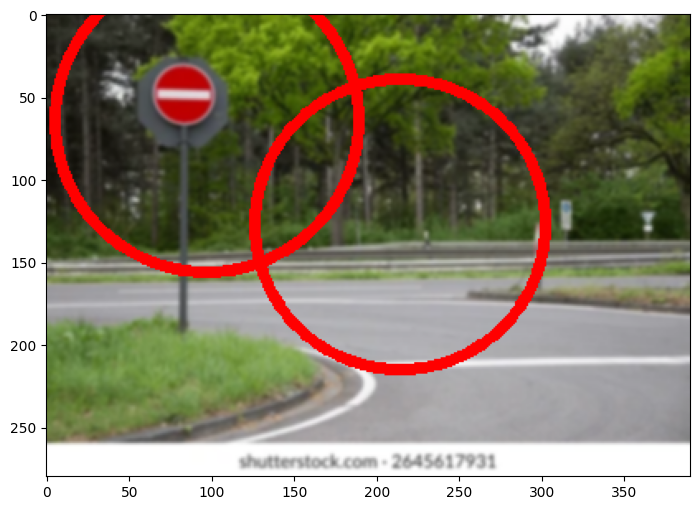

In [ ]:

dp = 1.05
minDist = 100
param1 = 105
param2 = 50
minRadius = 75
maxRadius = 200


sign_image = np.copy(traffic_sign_blurred)
circles = cv2.HoughCircles(signs_gray, cv2.HOUGH_GRADIENT, dp = dp, minDist=minDist, param1 = param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)


circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(sign_image, (i[0], i[1]), i[2], (255, 0, 0), 5)

plt.imshow(sign_image)



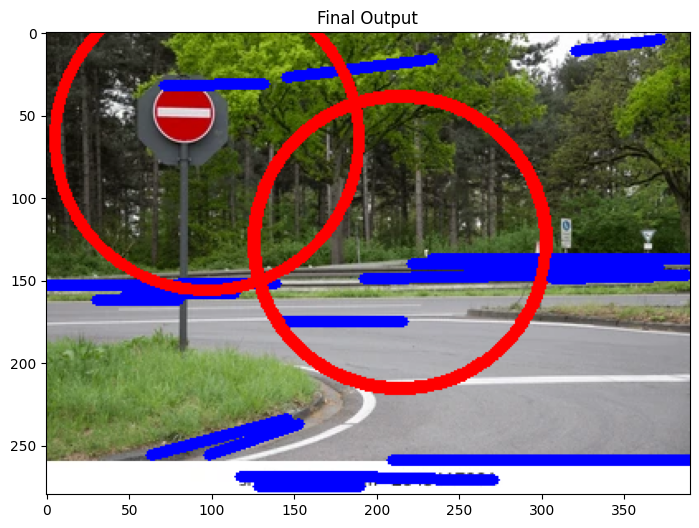

In [ ]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(traffic_sign,(x1,y1),(x2,y2),(0,0,255),5)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(traffic_sign, (i[0], i[1]), i[2], (255, 0, 0), 5)

plt.title('Final Output')
plt.imshow(traffic_sign)